In [1]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

In [2]:
def sentiment_analysis(text):
    ss = sid.polarity_scores(text)
    for k in ss:
        print('{0}: {1}, '.format(k, ss[k]), end='')


In [3]:
sentiment_analysis('I am loving this')

neg: 0.0, neu: 0.339, pos: 0.661, compound: 0.5994, 

In [4]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

## Decision Tree

### Loading Data

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import KeyedVectors, Word2Vec
import pickle
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

from tqdm import tqdm_notebook as tqdm
import os
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from scipy.sparse import hstack
from wordcloud import WordCloud
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier

import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np

%matplotlib inline

In [6]:
df = pd.read_csv('data/preprocessed_df.csv')
print(df.shape)
df.head()

(109248, 12)


school_state teacher_prefix project_grade_category  \
0           in            mrs          grades_prek_2   
1           fl             mr             grades_6_8   
2           az             ms             grades_6_8   
3           ky            mrs          grades_prek_2   
4           tx            mrs          grades_prek_2   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

       project_subject_categories project_subject_subcategories  \
0               literacy_language                  esl_literacy   
1    history_civics_health_sports  civics_government_teamsports   
2                   health_sports    health_wellness_teamsports   
3  literacy_language_math_science          literacy_mathematics   
4                    math_science                   mathematics   

                                               essay   price  \
0  students english learners working english seco...  154.60   
1  students arrive school eager learn polite gene...  299.00   
2  true champions not always ones win guts mia ha...  516.85   
3  work unique school filled esl english second l...  232.90   
4  second grade classroom next year made around 2...   67.98   

                 clean_categories           clean_subcategories  \
0               literacy_language                  esl_literacy   
1    history_civics_health_sports  civics_government_teamsports   
2                   health_sports    health_wellness_teamsports   
3  literacy_language_math_science          literacy_mathematics   
4                    math_science                   mathematics   

                                     project_title  
0        educational support english learners home  
1                 wanted projector hungry learners  
2  soccer equipment awesome middle school students  
3                           techie kindergarteners  
4                           interactive math tools

In [7]:
df = df[pd.notnull(df['project_title'])]
df.shape

(109205, 12)

In [8]:
y = df['project_is_approved'].values
X = df.drop(['project_is_approved'], axis=1)
X.head()

school_state teacher_prefix project_grade_category  \
0           in            mrs          grades_prek_2   
1           fl             mr             grades_6_8   
2           az             ms             grades_6_8   
3           ky            mrs          grades_prek_2   
4           tx            mrs          grades_prek_2   

   teacher_number_of_previously_posted_projects  \
0                                             0   
1                                             7   
2                                             1   
3                                             4   
4                                             1   

       project_subject_categories project_subject_subcategories  \
0               literacy_language                  esl_literacy   
1    history_civics_health_sports  civics_government_teamsports   
2                   health_sports    health_wellness_teamsports   
3  literacy_language_math_science          literacy_mathematics   
4                    math_science                   mathematics   

                                               essay   price  \
0  students english learners working english seco...  154.60   
1  students arrive school eager learn polite gene...  299.00   
2  true champions not always ones win guts mia ha...  516.85   
3  work unique school filled esl english second l...  232.90   
4  second grade classroom next year made around 2...   67.98   

                 clean_categories           clean_subcategories  \
0               literacy_language                  esl_literacy   
1    history_civics_health_sports  civics_government_teamsports   
2                   health_sports    health_wellness_teamsports   
3  literacy_language_math_science          literacy_mathematics   
4                    math_science                   mathematics   

                                     project_title  
0        educational support english learners home  
1                 wanted projector hungry learners  
2  soccer equipment awesome middle school students  
3                           techie kindergarteners  
4                           interactive math tools

### Splitting data into Train and cross validation(or test): Stratified Sampling

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)
print(X_train.shape, y_train.shape), print(X_cv.shape, y_cv.shape), print(X_test.shape, y_test.shape)


(69891, 11) (69891,)
(17473, 11) (17473,)
(21841, 11) (21841,)


(None, None, None)

## Make Data Model Ready: encoding eassay, and project_title

In [10]:
tfidf_all_features = []
tfidf_w2v_all_features = []

#### Essay

In [11]:
vectorizer_tfidf = TfidfVectorizer(lowercase=False)

X_train_essay_tfidf = vectorizer_tfidf.fit_transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer_tfidf.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer_tfidf.transform(X_test['essay'].values)

print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

tfidf_all_features.extend(vectorizer_tfidf.get_feature_names())


(69891, 47197) (69891,)
(17473, 47197) (17473,)
(21841, 47197) (21841,)


### Title

In [12]:
vectorizer_tfidf_item = TfidfVectorizer(lowercase=False)

X_train_title_tfidf = vectorizer_tfidf_item.fit_transform(X_train['project_title'].values)
X_cv_title_tfidf = vectorizer_tfidf_item.transform(X_cv['project_title'].values)
X_test_title_tfidf = vectorizer_tfidf_item.transform(X_test['project_title'].values)

print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)

tfidf_all_features.extend(vectorizer_tfidf_item.get_feature_names())


(69891, 13630) (69891,)
(17473, 13630) (17473,)
(21841, 13630) (21841,)


In [13]:
# https://stackoverflow.com/questions/37793118/load-pretrained-glove-vectors-in-python

def load_glove_model(gloveFile):
    with open(gloveFile, 'r', encoding='utf8') as f:
        model = {}
        for line in tqdm(f):
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            model[word] = embedding
    return model

In [14]:
model = load_glove_model('../models/glove.42B.300d.txt')

In [15]:
glove_words = set(model.keys())

In [16]:
tfidf_data = list(X_train['essay'] + X_train['project_title'])

tfidf_w2v = TfidfVectorizer()
tfidf_w2v.fit_transform(tfidf_data)

<69891x57697 sparse matrix of type '<class 'numpy.float64'>'
	with 7172729 stored elements in Compressed Sparse Row format>

In [17]:
def tfidf_w2v_emb(tfidf_model, word_list):
    dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
    tfidf_words = set(tfidf_model.get_feature_names())
    tfidf_w2v_vectors = []
    for sentence in tqdm(word_list):
        vector = np.zeros(300)
        tf_idf_weight = 0
        for word in sentence.split():
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word]
                tf_idf = dictionary[word] * (sentence.count(word)/len(sentence.split())) 
                vector += (vec * tf_idf)
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    print(len(tfidf_w2v_vectors))
    print(len(tfidf_w2v_vectors[0]))
    return tfidf_w2v_vectors
    

In [18]:
tfidf_w2v_train = tfidf_w2v_emb(tfidf_w2v, X_train['essay'].values)
tfidf_w2v_cv = tfidf_w2v_emb(tfidf_w2v, X_cv['essay'].values)
tfidf_w2v_test = tfidf_w2v_emb(tfidf_w2v, X_test['essay'].values)

#for titles
tfidf_w2v_title_train = tfidf_w2v_emb(tfidf_w2v, X_train['project_title'].values)
tfidf_w2v_title_cv = tfidf_w2v_emb(tfidf_w2v, X_cv['project_title'].values)
tfidf_w2v_title_test = tfidf_w2v_emb(tfidf_w2v, X_test['project_title'].values)



69891
300



17473
300



21841
300



69891
300



17473
300



21841
300


In [19]:
tfidf_w2v_all_features.extend(list(glove_words))

### Encoding categorical variable school state

In [20]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)

X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

tfidf_all_features.extend(vectorizer.get_feature_names())
tfidf_w2v_all_features.extend(vectorizer.get_feature_names())

(69891, 51) (69891,)
(17473, 51) (17473,)
(21841, 51) (21841,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### encoding categorical features: teacher_prefix

In [21]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)

X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

tfidf_all_features.extend(vectorizer.get_feature_names())
tfidf_w2v_all_features.extend(vectorizer.get_feature_names())

(69891, 5) (69891,)
(17473, 5) (17473,)
(21841, 5) (21841,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [22]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)

X_train_project_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_project_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_project_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print(X_train_project_ohe.shape, y_train.shape)
print(X_cv_project_ohe.shape, y_cv.shape)
print(X_test_project_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

tfidf_all_features.extend(vectorizer.get_feature_names())
tfidf_w2v_all_features.extend(vectorizer.get_feature_names())

(69891, 4) (69891,)
(17473, 4) (17473,)
(21841, 4) (21841,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


### Normalize price

In [23]:
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(1, -1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1, -1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1, -1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1, -1))

X_train_price_norm = X_train_price_norm.reshape(-1, 1)
X_cv_price_norm = X_cv_price_norm.reshape(-1, 1)
X_test_price_norm = X_test_price_norm.reshape(-1, 1)

print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

tfidf_all_features.extend(vectorizer.get_feature_names())
tfidf_w2v_all_features.extend(vectorizer.get_feature_names())

(69891, 1) (69891,)
(17473, 1) (17473,)
(21841, 1) (21841,)


In [24]:
normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))

X_train_prev_proj_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))
X_cv_prev_proj_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))
X_test_prev_proj_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))


X_train_prev_proj_norm = X_train_prev_proj_norm.reshape(-1, 1)
X_cv_prev_proj_norm = X_cv_prev_proj_norm.reshape(-1, 1)
X_test_prev_proj_norm = X_test_prev_proj_norm.reshape(-1, 1)


print(X_train_prev_proj_norm.shape, y_train.shape)
print(X_cv_prev_proj_norm.shape, y_cv.shape)
print(X_test_prev_proj_norm.shape, y_test.shape)
print("="*100)

tfidf_all_features.extend(vectorizer.get_feature_names())
tfidf_w2v_all_features.extend(vectorizer.get_feature_names())

(69891, 1) (69891,)
(17473, 1) (17473,)
(21841, 1) (21841,)


## Preparing data for TFIDF

In [25]:
X_train_tfidf = hstack((X_train_essay_tfidf, X_train_title_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_project_ohe, X_train_price_norm, X_train_prev_proj_norm)).tocsr()
X_cv_tfidf = hstack((X_cv_essay_tfidf, X_cv_title_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_project_ohe, X_cv_price_norm, X_cv_prev_proj_norm)).tocsr()
X_test_tfidf = hstack((X_test_essay_tfidf, X_test_title_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_project_ohe, X_test_price_norm, X_test_prev_proj_norm)).tocsr()

print("Final Data matrix")
print(X_train_tfidf.shape, y_train.shape)
print(X_cv_tfidf.shape, y_cv.shape)
print(X_test_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix
(69891, 60889) (69891,)
(17473, 60889) (17473,)
(21841, 60889) (21841,)


## Preparing data for TFIDF-W2V

In [26]:
X_train_tfidf_w2v = hstack((tfidf_w2v_train, tfidf_w2v_title_train, X_train_state_ohe, X_train_teacher_ohe, X_train_project_ohe, X_train_price_norm, X_train_prev_proj_norm)).tocsr()
X_cv_tfidf_w2v = hstack((tfidf_w2v_cv, tfidf_w2v_title_cv, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_project_ohe, X_cv_price_norm, X_cv_prev_proj_norm)).tocsr()
X_test_tfidf_w2v = hstack((tfidf_w2v_test, tfidf_w2v_title_test, X_test_state_ohe, X_test_teacher_ohe, X_test_project_ohe, X_test_price_norm, X_test_prev_proj_norm)).tocsr()

print("Final Data matrix")
print(X_train_tfidf_w2v.shape, y_train.shape)
print(X_cv_tfidf_w2v.shape, y_cv.shape)
print(X_test_tfidf_w2v.shape, y_test.shape)
print("="*100)

Final Data matrix
(69891, 662) (69891,)
(17473, 662) (17473,)
(21841, 662) (21841,)


In [27]:
X_tfidf_w2v_all = np.array([X_train_tfidf_w2v, X_cv_tfidf_w2v, X_test_tfidf_w2v])
X_tfidf_all = np.array([X_train_tfidf, X_cv_tfidf, X_test_tfidf])


In [28]:
y_all = np.array([y_train, y_cv, y_test])

In [29]:
# with open('tmp/tfidf_w2v_all_features', 'wb') as f:
#     pickle.dump(tfidf_w2v_all_features, f)

## Load from pickle

In [30]:
!ls tmp

tfidf			   title_tfidf		  X_tfidf_all
tfidf_all_features	   title_tfidf_w2v	  X_tfidf_all_gb
tfidf_all_features_gb	   vectorizer_tfidf	  X_tfidf_w2v_all
tfidf_w2v		   vectorizer_tfidf_item  X_tfidf_w2v_all_gb
tfidf_w2v_all_features	   w2v_model_title	  y_all
tfidf_w2v_all_features_gb  w2v_words		  y_all_gb


In [121]:
np.sum(y_train == 1), np.sum(y_train == 0)

(59315, 10576)

## Applying Decision tree on processed Data

In [117]:
def cross_validate_model(X_train, Y_train):
    model = DecisionTreeClassifier(class_weight="balanced")
    parameters = { 'max_depth': [1, 5, 10, 20, 50], 'min_samples_split': [3, 5, 10, 50, 100, 500] }
    model = model
    clf = GridSearchCV(model, parameters, cv=2, scoring=make_scorer(roc), return_train_score=True, verbose=1, n_jobs=-1)
    clf.fit(X_train, y_train)
    
    train_auc_mean = clf.cv_results_['mean_train_score']
    train_auc_std = clf.cv_results_['std_train_score']
    cv_auc_mean = clf.cv_results_['mean_test_score'] 
    cv_auc_std = clf.cv_results_['std_test_score']
    optimal_depth = clf.best_params_['max_depth']
    optimal_split = clf.best_params_['min_samples_split']
    return (clf.cv_results_['param_max_depth'].data, clf.cv_results_['param_min_samples_split'].data,
            parameters['max_depth'], parameters['min_samples_split'], optimal_depth, optimal_split, train_auc_mean, 
                train_auc_std, cv_auc_mean, cv_auc_std)

def plot_cross_validate(depth, split, train_auc_mean, train_auc_std, cv_auc_mean, cv_auc_std):
    # this code is refered from: https://stackoverflow.com/a/48803361/4084039
    plt.figure(figsize=(20, 15))
    trace1 = go.Scatter3d(x=split,y=depth,z=train_auc_mean, name = 'train')
    trace2 = go.Scatter3d(x=split,y=depth,z=cv_auc_mean, name = 'Cross validation')
    data = [trace1, trace2]
    
    layout = go.Layout(scene = dict(
                xaxis = dict(title='min_samples_split'),
                yaxis = dict(title='max_depth'),
                zaxis = dict(title='AUC'),))

    fig = go.Figure(data=data, layout=layout)
    offline.iplot(fig, filename='3d-scatter-colorscale')

def plot_cross_validate_hm(depth, split, train_auc_mean, train_auc_std, cv_auc_mean, cv_auc_std):
    n = len(depth)
    m = len(split)
    df_train = pd.DataFrame(data=train_auc_mean.reshape(m, n), index=split, columns=depth)
    df_test = pd.DataFrame(data=cv_auc_mean.reshape(m, n), index=split, columns=depth)
    fig, ax = plt.subplots(1, 2, figsize=(20, 12))
    sns.heatmap(df_train, annot = True, fmt='.4g', ax=ax[0])
    sns.heatmap(df_test, annot = True, fmt='.4g', ax=ax[1])
    ax[0].set_xlabel('n_estimators')
    ax[0].set_ylabel('max_depth')
    ax[0].set_title('Train Set')
    
    ax[1].set_xlabel('n_estimators')
    ax[1].set_ylabel('max_depth')
    ax[1].set_title('CV Set')
    
def model_auc_roc_score(X_train, y_train, X_test, y_test, optimal_depth, optimal_split, class_weight='balanced'):
    model = DecisionTreeClassifier(max_depth=optimal_depth, min_samples_split=optimal_split, class_weight=class_weight)
    model.fit(X_train, y_train)

    y_train_proba = model.predict_proba(X_train)[:,1]
    y_test_proba = model.predict_proba(X_test)[:, 1]
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_proba)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_proba)
    return model, y_train_proba, train_fpr, train_tpr, train_thresholds, y_test_proba, test_fpr, test_tpr, test_thresholds

def plot_auc_roc_score(train_fpr, train_tpr, test_fpr, test_tpr):
    plt.figure(figsize=(15, 12))
    
    plt.plot(train_fpr, train_tpr, label=f"Train AUC = {auc(train_fpr, train_tpr)}")
    plt.plot(test_fpr, test_tpr, label=f"Test AUC = {auc(test_fpr, test_tpr)}")
    plt.plot([0, 1], [0, 1], 'g--')
    plt.legend()
    plt.xlabel("False Positive Rate(FPR)")
    plt.ylabel("True Positive Rate(TPR)")
    plt.title("AUC")
    plt.grid(color='black', linestyle='-', linewidth=0.5)
    plt.show()
    
def predict(proba, thresholds, tpr, fpr):
    pred = []
    best_thres = thresholds[np.argmax(tpr * (1 - fpr))]
    for prob in proba:
        if prob >= best_thres:
            pred.append(1)
        else:
            pred.append(0)
    return best_thres, pred
    
    
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    df = pd.DataFrame(cm)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df, annot=True, fmt='d')
    plt.title("Confusion Matrix for test data")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
def get_top_and_worst_features(model, all_features, num_of_features=20):
    pos_indx = model.feature_importances_.argsort()[::-1][:num_of_features]
    neg_indx = model.feature_importances_.argsort()[:num_of_features]
    top_features = []
    worst_features = []
    for i in list(pos_indx[:num_of_features]):
        top_features.append(all_features[i])

    for i in list(neg_indx[:num_of_features]):
        worst_features.append(all_features[i])
        
    return top_features, worst_features


def build_word_cloud(features):
    features = ' '.join(features)
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white').generate(features)
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    

def get_false_positives(y_pred, y_test, feature=[]):
    fp_index = []
    for i in range(len(y_test)) :
        if (y_test[i] == 0) & (y_pred[i] == 1) :
            fp_index.append(i)
    fp_names = []
    for i in fp_index :
        fp_names.append(X_test['essay'].values[i])
    return fp_names, fp_index

def build_false_positive_price(fp_index):
    cols = X_test.columns
    X_test_falsePos1 = pd.DataFrame(columns=cols)
    for i in fp_index:
        X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))
    sns.boxplot(y='price', data=X_test_falsePos1)
    return X_test_falsePos1

def false_positive_pdf(X_test_falsePos):
    plt.figure(figsize=(8,5))
    counts, bin_edges = np.histogram(X_test_falsePos['teacher_number_of_previously_posted_projects'],bins='auto', density=True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    pdfP, = plt.plot(bin_edges[1:], pdf)
    cdfP, = plt.plot(bin_edges[1:], cdf)
    plt.legend([pdfP, cdfP], ["PDF", "CDF"])
    plt.xlabel('teacher_number_of_previously_posted_projects')
    plt.show()

def build_model(X_train, y_train, X_test, y_test, all_features, num_of_features=20):
    combined_depth, combined_split, depth, split, optimal_depth, optimal_split, train_auc_mean, train_auc_std, cv_auc_mean, cv_auc_std = cross_validate_model(X_train, y_train)
    plot_cross_validate_hm(depth, split, train_auc_mean, train_auc_std, cv_auc_mean, cv_auc_std)
    plot_cross_validate(combined_depth, combined_split, train_auc_mean, train_auc_std, cv_auc_mean, cv_auc_std)
    model, y_train_proba, train_fpr, train_tpr, train_thresholds, y_test_proba, test_fpr, test_tpr, test_thresholds = model_auc_roc_score(X_train, y_train, X_test, y_test, optimal_depth, optimal_split)
    plot_auc_roc_score(train_fpr, train_tpr, test_fpr, test_tpr)
    thresh, y_pred = predict(y_test_proba, test_thresholds, test_tpr, test_fpr)
    print(f'The best threshold value:: {thresh}')
    plot_confusion_matrix(y_test, y_pred)
    fp_names, fp_index = get_false_positives(y_pred, y_test)
    X_test_falsePos = build_false_positive_price(fp_index)
    false_positive_pdf(X_test_falsePos)
    
#     top_features, worst_features = get_top_and_worst_features(model, all_features, num_of_features)
#     build_word_cloud(top_features)
#     build_word_cloud(worst_features)
    return optimal_depth, optimal_split, train_fpr, train_tpr, test_fpr, test_tpr, y_pred
    
    


### Applying the model on TF-IDF features


In [61]:
(combined_depth, combined_split, depth, split, optimal_depth, 
    optimal_split, train_auc_mean, train_auc_std, cv_auc_mean, cv_auc_std) = cross_validate_model(X_train_tfidf, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    6.0s remaining:   18.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   11.2s finished


In [62]:
optimal_depth, optimal_split

(10, 10)

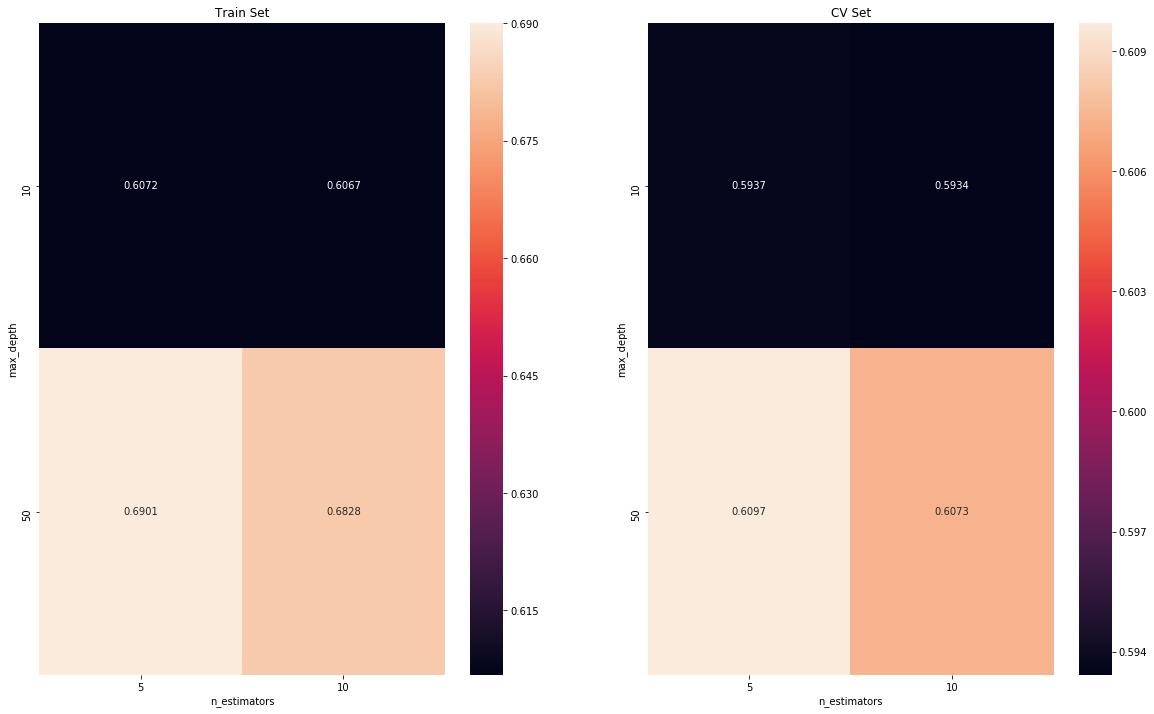

In [63]:
plot_cross_validate_hm(depth, split, train_auc_mean, train_auc_std, cv_auc_mean, cv_auc_std)

In [64]:
plot_cross_validate(combined_depth, combined_split, train_auc_mean, train_auc_std, cv_auc_mean, cv_auc_std)

<Figure size 1440x1080 with 0 Axes>

> <ipython-input-60-6216fa341ba8>(52)model_auc_roc_score()
-> model = DecisionTreeClassifier(max_depth=optimal_depth, min_samples_split=optimal_split, class_weight=class_weight)
(Pdb) c


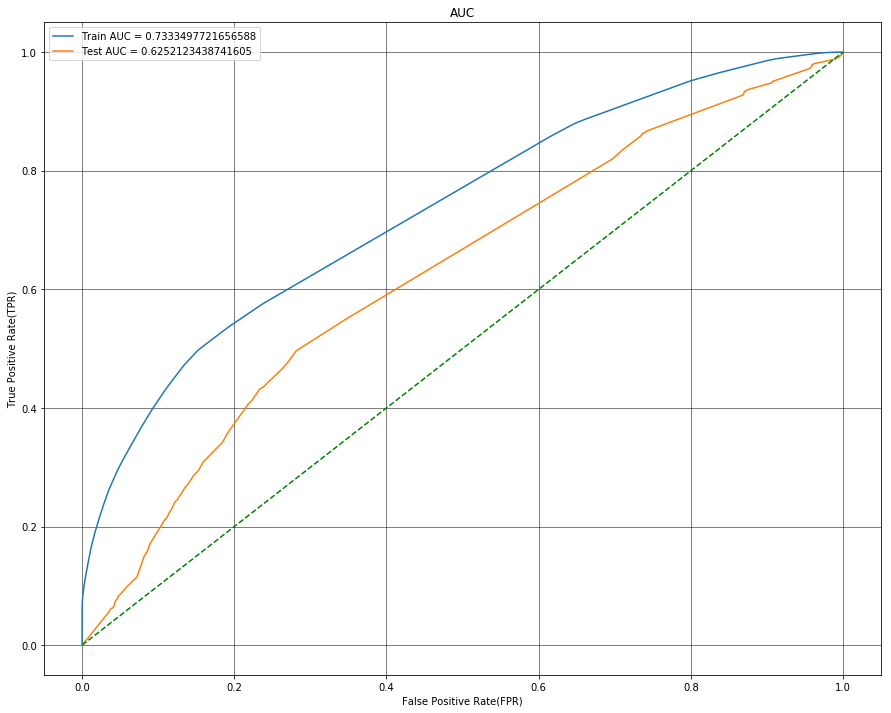

In [66]:
model_tfidf, y_train_proba, train_fpr, train_tpr, train_thresholds, y_test_proba, test_fpr, test_tpr, test_thresholds = model_auc_roc_score(X_train_tfidf, y_train, X_test_tfidf, y_test, optimal_depth, optimal_split)
plot_auc_roc_score(train_fpr, train_tpr, test_fpr, test_tpr)


In [68]:
model_tfidf

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

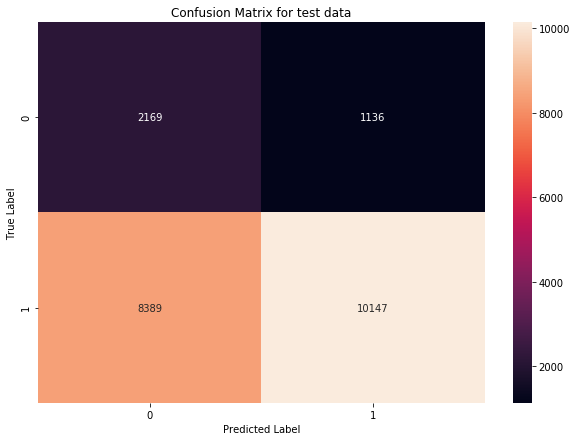

In [69]:
thresh, y_pred = predict(y_test_proba, test_thresholds, test_tpr, test_fpr)
plot_confusion_matrix(y_test, y_pred)

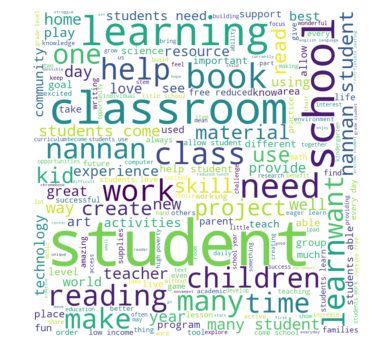

In [70]:
fp_names, fp_index = get_false_positives(y_pred, y_test)
build_word_cloud(fp_names)

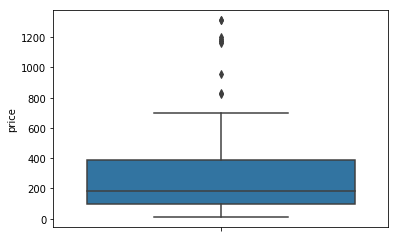

In [71]:
X_test_falsePos = build_false_positive_price(fp_index)

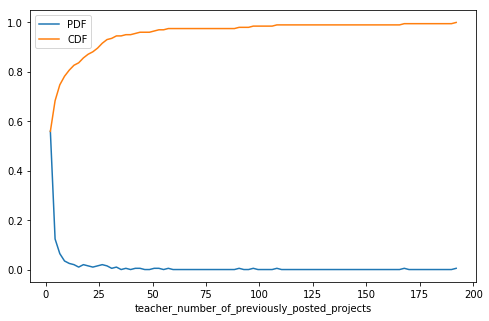

In [72]:
false_positive_pdf(X_test_falsePos)

In [73]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyperparameter: Max Depth", "Hyperparameter: Split", "Train AUC", "Test AUC"]

auc_train_tfidf = auc(train_fpr, train_tpr)
auc_test_tfidf = auc(test_fpr, test_tpr)

x.add_row(["TF-IDF", "Decision Tree", optimal_depth, optimal_split, round(auc_train_tfidf, 2),round(auc_test_tfidf, 2)])


### Applying the model on TFIDF-W2V model

In [74]:
(combined_depth, combined_split, depth, split, optimal_depth, 
    optimal_split, train_auc_mean, train_auc_std, cv_auc_mean, cv_auc_std) = cross_validate_model(X_train_tfidf_w2v, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   26.6s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   59.7s finished


In [75]:
optimal_depth, optimal_split

(5, 10)

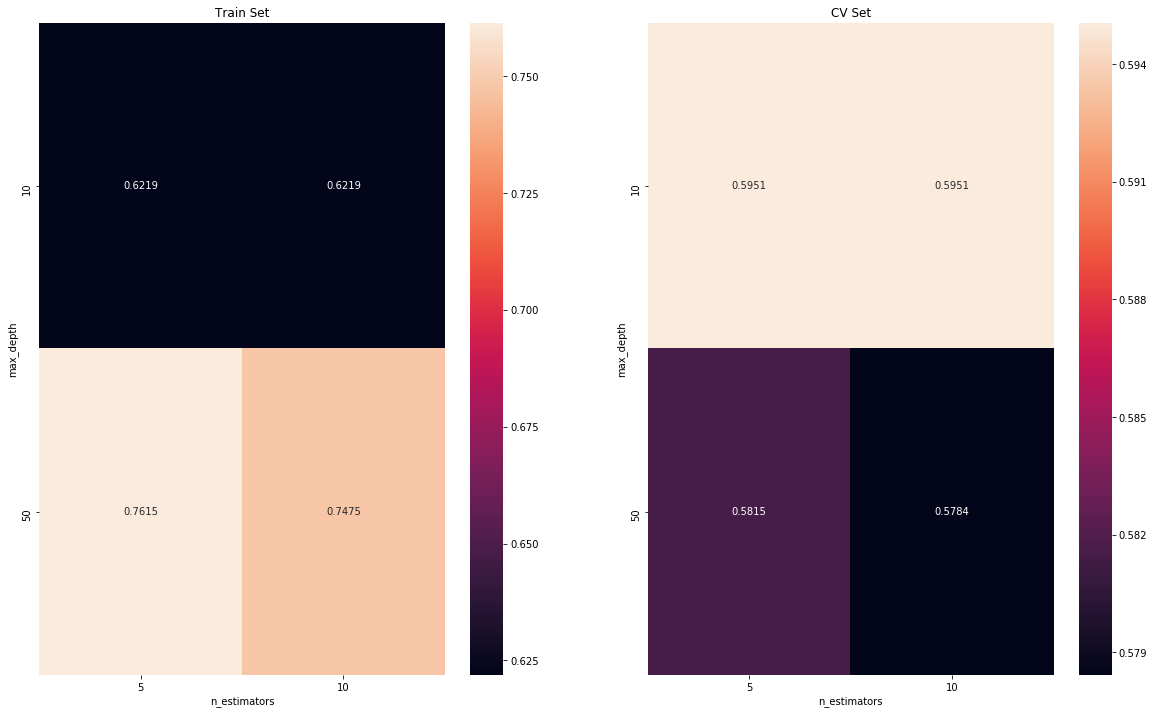

In [76]:
plot_cross_validate_hm(depth, split, train_auc_mean, train_auc_std, cv_auc_mean, cv_auc_std)

In [77]:
plot_cross_validate(combined_depth, combined_split, train_auc_mean, train_auc_std, cv_auc_mean, cv_auc_std)

<Figure size 1440x1080 with 0 Axes>

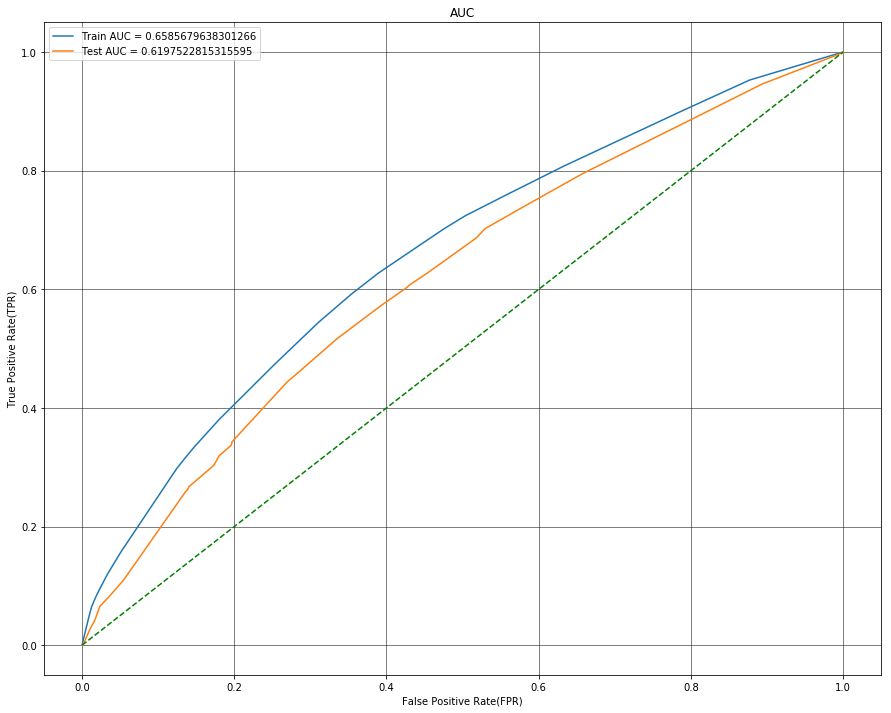

In [78]:
model_w2v, y_train_proba, train_fpr, train_tpr, train_thresholds, y_test_proba, test_fpr, test_tpr, test_thresholds = model_auc_roc_score(X_train_tfidf_w2v, y_train, X_test_tfidf_w2v, y_test, optimal_depth, optimal_split)
plot_auc_roc_score(train_fpr, train_tpr, test_fpr, test_tpr)


In [79]:
model_w2v

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

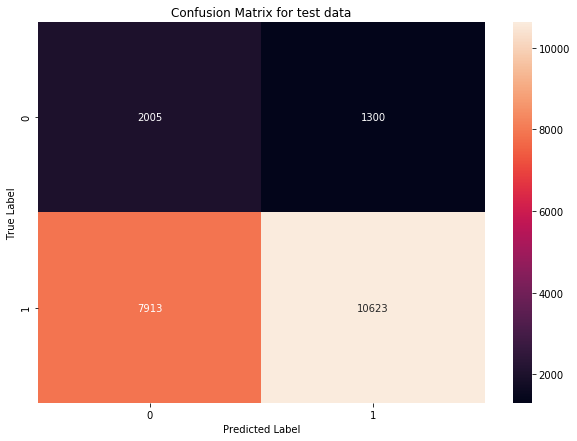

In [80]:
thresh, y_pred = predict(y_test_proba, test_thresholds, test_tpr, test_fpr)
plot_confusion_matrix(y_test, y_pred)

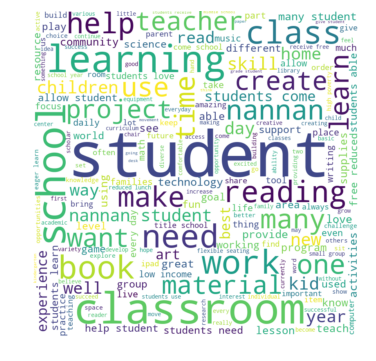

In [81]:
fp_names, fp_index = get_false_positives(y_pred, y_test)
build_word_cloud(fp_names)

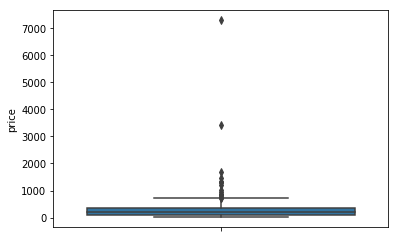

In [82]:
X_test_falsePos = build_false_positive_price(fp_index)

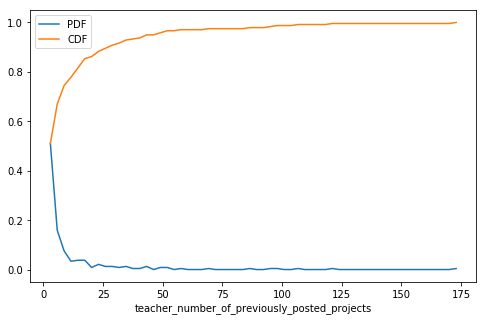

In [83]:
false_positive_pdf(X_test_falsePos)

In [84]:
auc_train_tfidf_w2v = auc(train_fpr, train_tpr)
auc_test_tfidf_w2v = auc(test_fpr, test_tpr)

x.add_row(["TF-IDF-W2V", "Decision Tree", optimal_depth, optimal_split, round(auc_train_tfidf_w2v, 2),round(auc_test_tfidf_w2v, 2)])


In [85]:
model_tfidf

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Applying Model on non-zero TF-IDF feature

### Fiiting model with maximum depth for feature importance

In [86]:
model = DecisionTreeClassifier(class_weight='balanced', max_depth=None, min_samples_split=2)
model.fit(X_train_tfidf, y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### All features where feature importance is greater than 0

In [87]:
X_train_tfidf_nonzero = X_train_tfidf[:, model.feature_importances_[model.feature_importances_ != 0]]

X_cv_tfidf_nonzero = X_cv_tfidf[:, model.feature_importances_[model.feature_importances_ != 0]]

X_test_tfidf_nonzero = X_test_tfidf[:, model.feature_importances_[model.feature_importances_ != 0]]


print(f"X_train_tfidf_nonzero:: {X_train_tfidf_nonzero.shape}")
print(f"X_cv_tfidf_nonzero:: {X_cv_tfidf_nonzero.shape}")
print(f"X_test_tfidf_nonzero:: {X_test_tfidf_nonzero.shape}")



X_train_tfidf_nonzero:: (69891, 2645)
X_cv_tfidf_nonzero:: (17473, 2645)
X_test_tfidf_nonzero:: (21841, 2645)


In [88]:
X_train_tfidf.shape, X_train_tfidf[:, model.feature_importances_[model.feature_importances_ != 0]].shape, X_train_tfidf[:, model.feature_importances_[model.feature_importances_ == 0]].shape

((69891, 60889), (69891, 2645), (69891, 58244))

In [99]:
(combined_depth, combined_split, depth, split, optimal_depth, 
    optimal_split, train_auc_mean, train_auc_std, cv_auc_mean, cv_auc_std) = cross_validate_model(X_train_tfidf_nonzero, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.5s finished


In [100]:
optimal_depth, optimal_split

(10, 10)

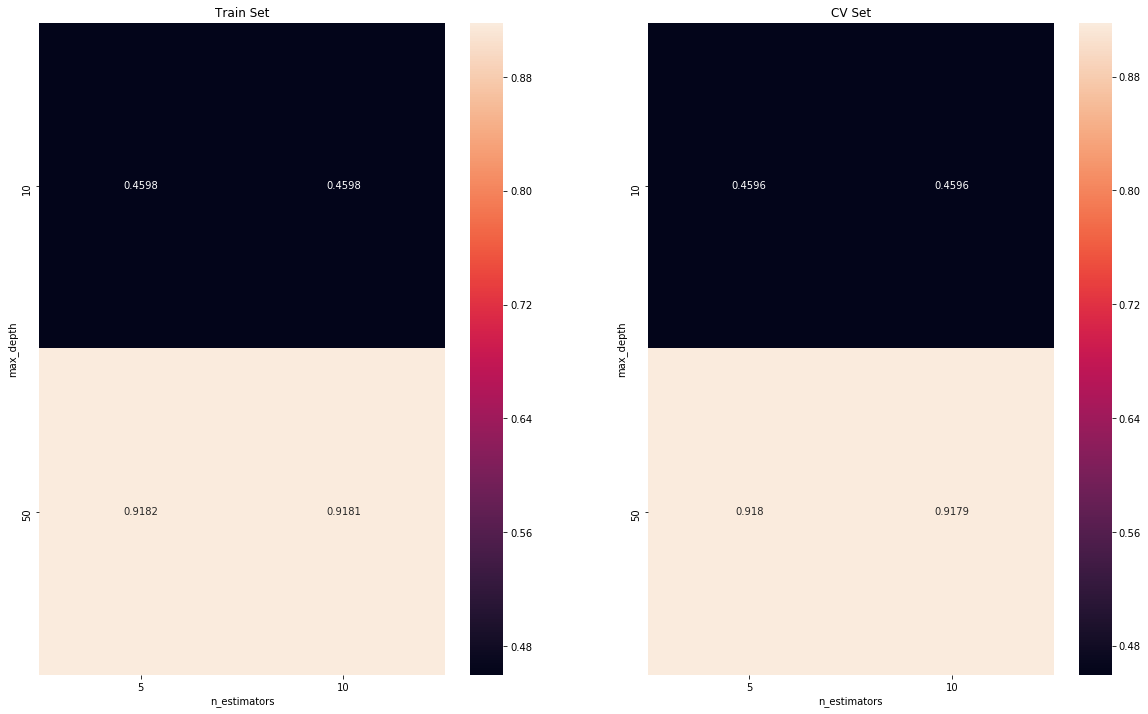

In [101]:
plot_cross_validate_hm(depth, split, train_auc_mean, train_auc_std, cv_auc_mean, cv_auc_std)


In [102]:
plot_cross_validate(combined_depth, combined_split, train_auc_mean, train_auc_std, cv_auc_mean, cv_auc_std)


<Figure size 1440x1080 with 0 Axes>

In [108]:
optimal_depth, optimal_split = 10, 50

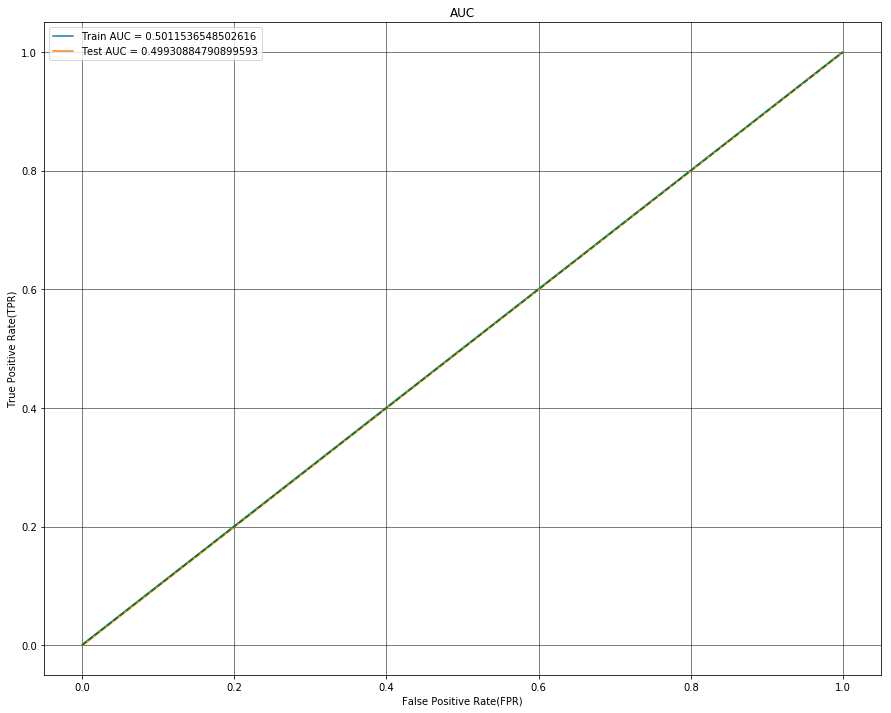

In [109]:
model_nz, y_train_proba, train_fpr, train_tpr, train_thresholds, y_test_proba, test_fpr, test_tpr, test_thresholds = model_auc_roc_score(X_train_tfidf_nonzero, y_train, X_test_tfidf_nonzero, y_test, None, optimal_split)
plot_auc_roc_score(train_fpr, train_tpr, test_fpr, test_tpr)


In [104]:
model_nz

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

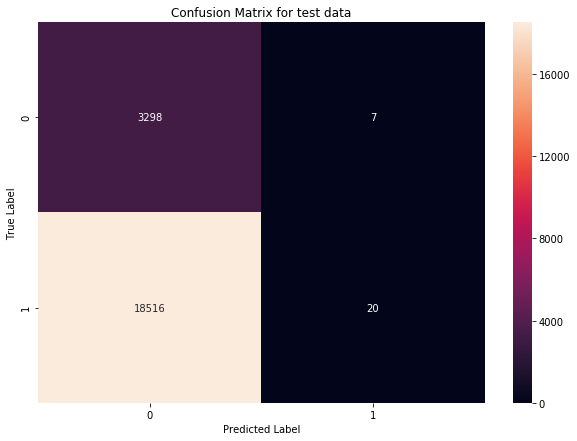

In [110]:
thresh, y_pred = predict(y_test_proba, test_thresholds, test_tpr, test_fpr)
plot_confusion_matrix(y_test, y_pred)

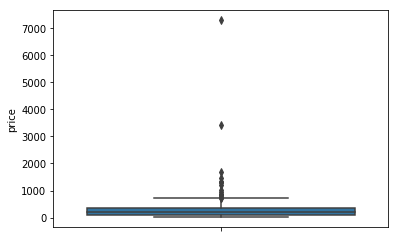

In [113]:
X_test_falsePos = build_false_positive_price(fp_index)

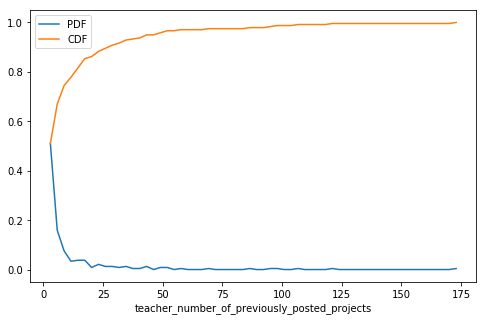

In [114]:
false_positive_pdf(X_test_falsePos)

In [115]:
auc_train_tfidf_w2v = auc(train_fpr, train_tpr)
auc_test_tfidf_w2v = auc(test_fpr, test_tpr)

x.add_row(["TF-IDF-Nonzero", "Decision Tree", optimal_depth, optimal_split, round(auc_train_tfidf_w2v, 2),round(auc_test_tfidf_w2v, 2)])


### Conclusion

In [116]:
print(x)

+----------------+---------------+---------------------------+-----------------------+-----------+----------+
|   Vectorizer   |     Model     | Hyperparameter: Max Depth | Hyperparameter: Split | Train AUC | Test AUC |
+----------------+---------------+---------------------------+-----------------------+-----------+----------+
|     TF-IDF     | Decision Tree |             10            |           10          |    0.73   |   0.63   |
|   TF-IDF-W2V   | Decision Tree |             5             |           10          |    0.66   |   0.62   |
| TF-IDF-Nonzero | Decision Tree |             10            |           50          |    0.5    |   0.5    |
+----------------+---------------+---------------------------+-----------------------+-----------+----------+
